In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

%matplotlib inline

In [ ]:
tweets = pd.read_csv('/Users/willstrauss/Documents/CPSC_Courses/MGSC_410/data/Tweets.csv')
tweets.shape

## Cleaning Data

In [ ]:
np.sum(tweets.isnull())

In [ ]:
#removing useless rows
tweets.drop(['negativereason_gold', 'airline_sentiment_gold', 'tweet_coord', 'tweet_id', 'tweet_created', 'tweet_location', 'text', 'name'], axis='columns', inplace=True)

#virgin america does not exist anymore and has very little data so it gets removed
tweets = tweets[tweets.airline != 'Virgin America']
tweets.reset_index(drop = True, inplace = True) #reset index

In [ ]:
tweets.head()

# Data Vizualization

### Visualizing Sentiment

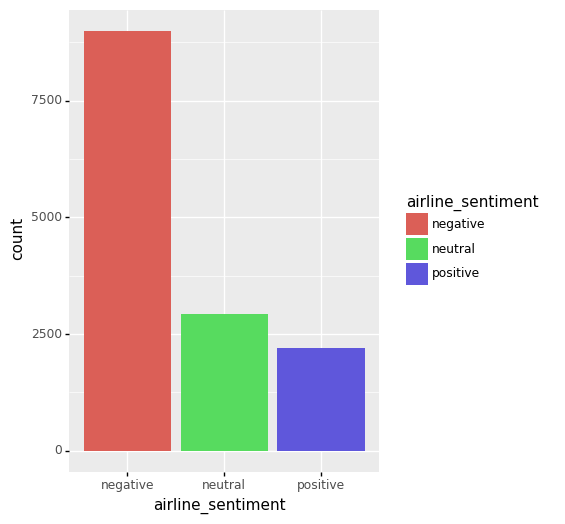

<ggplot: (8778467718440)>

In [30]:
ggplot(tweets, aes(x = 'airline_sentiment', fill = 'airline_sentiment')) + geom_bar() + theme(figure_size=(4, 6))

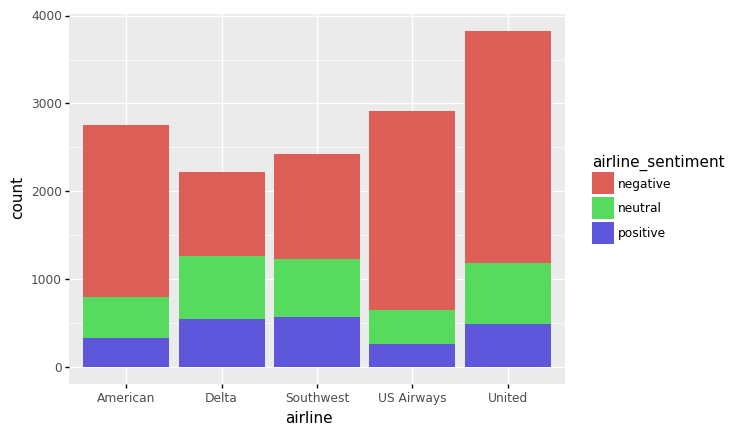

<ggplot: (8778467716852)>

In [31]:
ggplot(tweets, aes(x = 'airline', fill = 'airline_sentiment')) + geom_bar()

### Building Pie Chart

United:


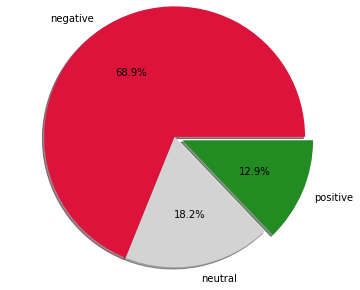

Southwest:


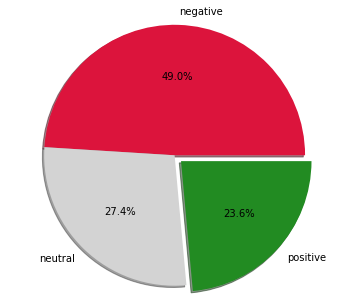

Delta:


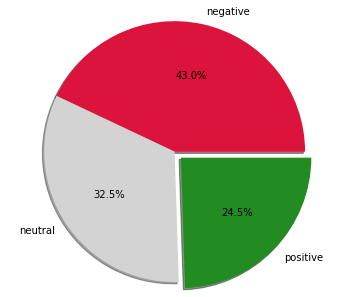

US Airways:


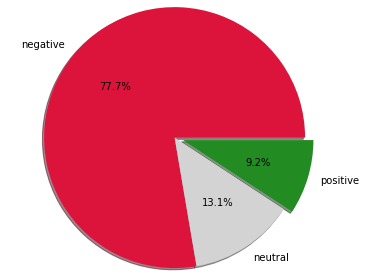

American:


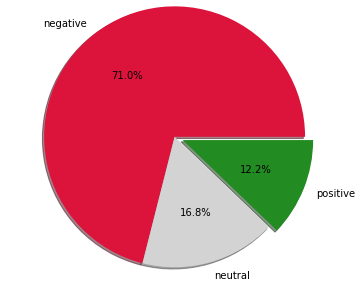

In [36]:
labels = ['negative', 'neutral', 'positive']
#getting names of each airline
airline_labels = tweets['airline'].unique()
#0 = American, 1 = Delta, 2 = Southwest, 3 = US Airways, 4 = United
airlines = [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]]

#populating airlines array
for i in range(len(airline_labels)):
    for j in range(len(tweets)):
        if tweets['airline'].iloc[j] == airline_labels[i]:
            if tweets['airline_sentiment'].iloc[j] == 'negative':
                (airlines[i])[0] += 1
            if tweets['airline_sentiment'].iloc[j] == 'neutral':
                (airlines[i])[1] += 1
            if tweets['airline_sentiment'].iloc[j] == 'positive':
                (airlines[i])[2] += 1

#printing pie charts
for i in range(len(airlines)):
    plt.axis('equal')
    plt.pie(airlines[i], labels = labels, colors = ['crimson','lightgray','forestgreen'], radius = 1.5, autopct = '%0.1f%%', shadow = True, explode = [0,0,0.1])
    print(airline_labels[i] + ':')
    plt.show()

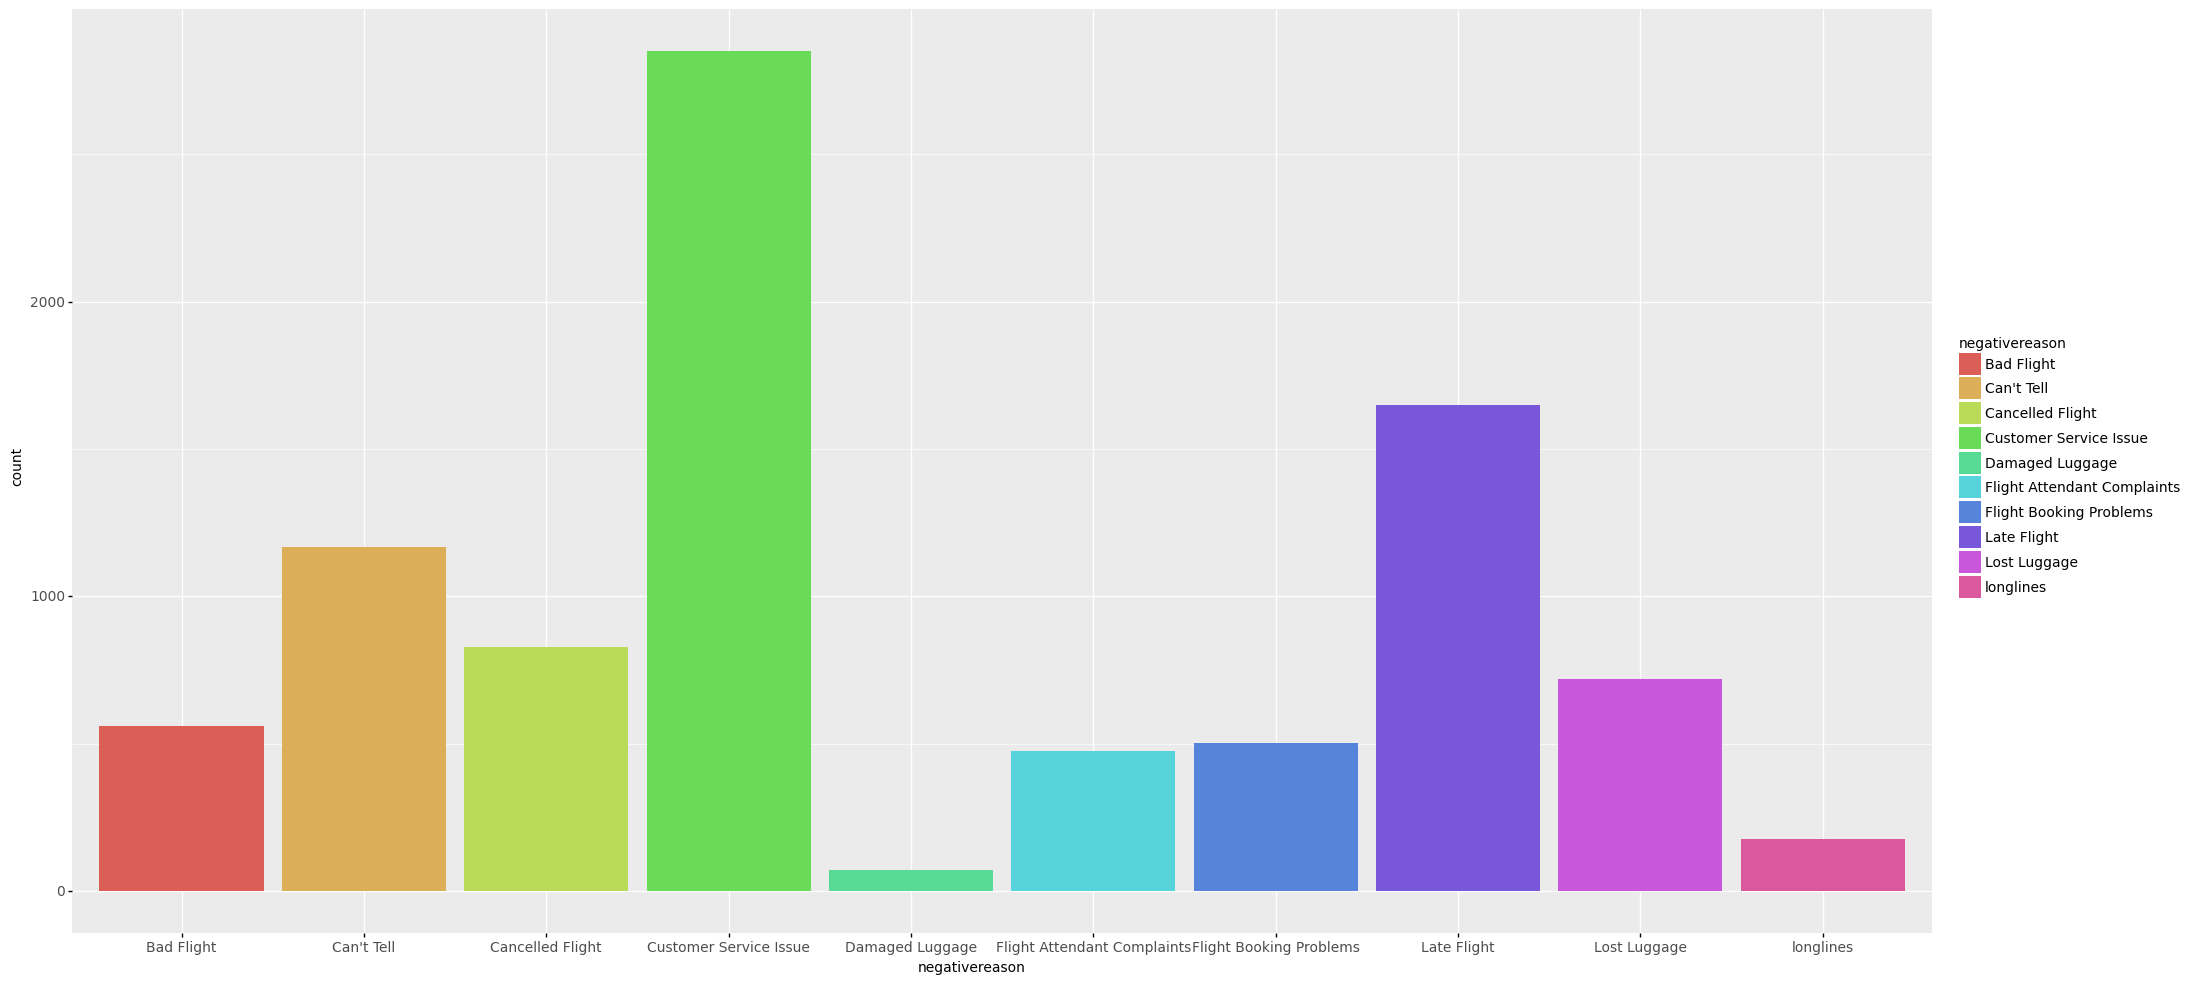

<ggplot: (8778467178518)>

In [37]:
#removing NA values for vizialization
tweets_clean = tweets
tweets_clean.dropna(subset = ['negativereason'], inplace=True)

ggplot(tweets_clean, aes(x = 'negativereason', fill = 'negativereason')) + geom_bar() + theme(text=element_text(size=10)) + theme(figure_size=(24, 12))


United:


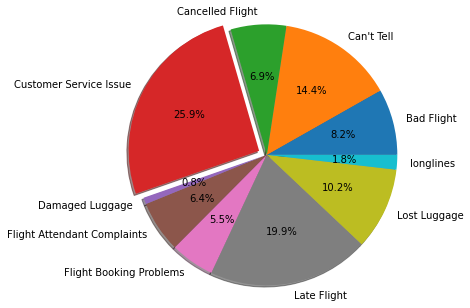

Southwest:


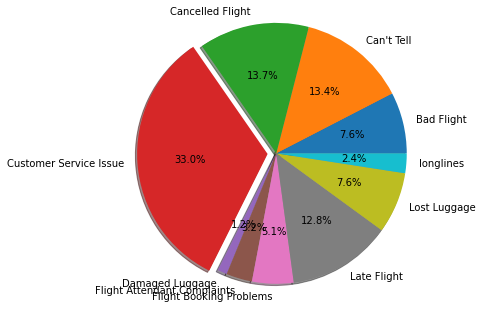

Delta:


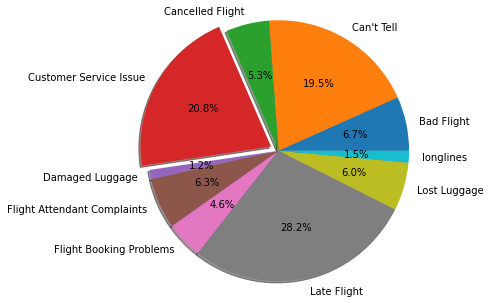

US Airways:


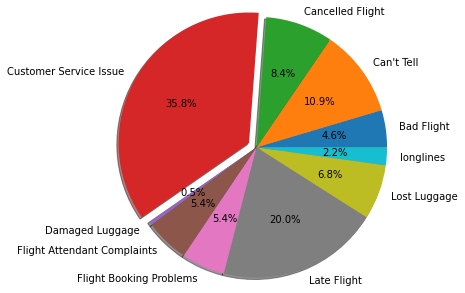

American:


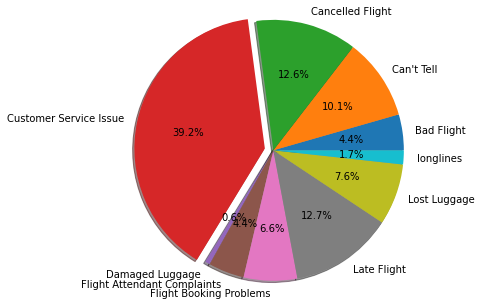

In [15]:
for i in range(len(airline_labels)):    
    data = tweets[tweets.airline == airline_labels[i]]

    values = [0,0,0,0,0,0,0,0,0,0]
    labels = data.groupby('negativereason').size()

    for j in range(len(labels)):
        values[j] = labels[j]

    plt.axis('equal')
    plt.pie(values, labels = labels.keys(), radius = 1.5, autopct = '%0.1f%%', shadow = True, explode = [0,0,0,0.1,0,0,0,0,0,0])
    print(airline_labels[i] + ':')
    plt.show()

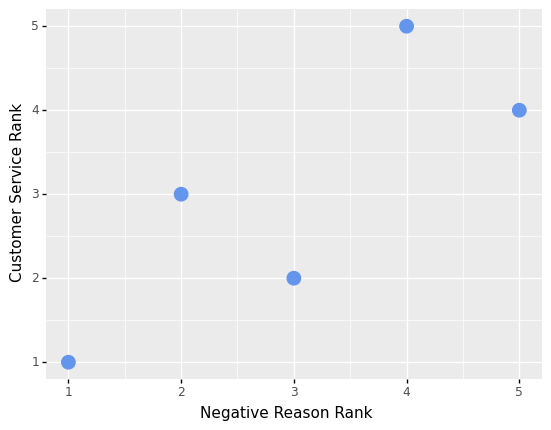

<ggplot: (8778423538342)>

In [59]:
negativereason_ranking = [1,2,3,4,5]
customerservice_ranking = [1,3,2,5,4]

rankings = pd.DataFrame({'Negative Reason Rank': negativereason_ranking, 'Customer Service Rank': customerservice_ranking})

ggplot(rankings, aes(x = 'Negative Reason Rank', y = 'Customer Service Rank')) + geom_point(color = 'cornflowerblue', size = 5)


In [62]:
r2_score(negativereason_ranking, customerservice_ranking)

0.6